In [1]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import timm


In [2]:
model = timm.create_model('ghostnet_100', pretrained=True)
conv_weights = []  # List to store convolutional layer weights
conv_layers = []  # List to store convolutional layers
total_conv_layers = 0  

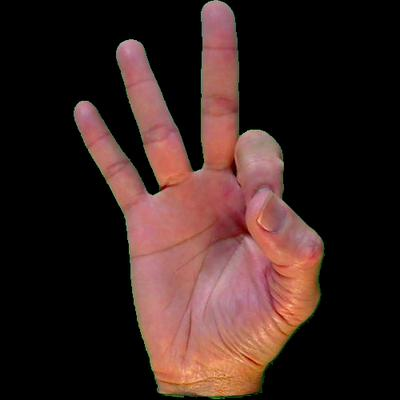

In [3]:
from PIL import Image
from IPython.display import display
img_path = "../asl_dataset/9/hand1_9_bot_seg_1_cropped.jpeg"
img = Image.open(img_path)

display(img)


In [4]:
# Traverse through the model to extract convolutional layers and their weights
for module in model.children():
	if isinstance(module, nn.Conv2d):
		total_conv_layers += 1
		conv_weights.append(module.weight)
		conv_layers.append(module)

print(f"Total convolution layers: {total_conv_layers}")


Total convolution layers: 2


In [5]:
conv_layers

[Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False),
 Conv2d(960, 1280, kernel_size=(1, 1), stride=(1, 1))]

In [6]:
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=0., std=1.)  # Normalize the image tensor
])

In [7]:
# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pretrained_model = model.to(device)

# Preprocess the image and move it to GPU
input_image = image_transform(img)
input_image = input_image.unsqueeze(0) # Add a batch dimension
input_image = input_image.to(device)

# Extract feature maps
feature_maps = [] # List to store feature maps
layer_names = [] # List to store layer names
for layer in conv_layers:
	input_image = layer(img)
	feature_maps.append(img)
	layer_names.append(str(layer))


TypeError: conv2d() received an invalid combination of arguments - got (JpegImageFile, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!JpegImageFile!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!JpegImageFile!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)
